# Plot Butler's importance in his Philadelphia Sixers year

## Imports 

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg

from PIL import Image

import datetime
from highlight_text import fig_text

## Retrieve data for Sixers


In [2]:
df = pd.read_csv("../data/teams_total/philadelphia_2018-2019.csv")

In [3]:
df.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Ben Simmons,22,79,79,2700,540,960,0.563,0,...,0.600,172,525,697,610,112,61,274,209,1337
1,2,J.J. Redick,34,76,63,2379,452,1027,0.440,240,...,0.894,20,166,186,206,32,17,101,129,1372
2,3,Joel Embiid,24,64,64,2154,580,1199,0.484,79,...,0.804,160,711,871,234,46,122,226,211,1761
3,4,Jimmy Butler,29,55,55,1824,344,747,0.461,50,...,0.868,105,185,290,220,99,29,81,93,1002
4,5,T.J. McConnell,26,76,3,1470,220,419,0.525,14,...,0.784,28,146,174,258,79,17,91,105,483


In [4]:
#df.loc[df['Player'].str.split().str.len() == 2, 'Player'] = df['Player'].str.split().str[-1]
df['Player']= df['Player'].str.split().str[-1]


In [5]:
df = df[['Player','FG', 'MP', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]

In [6]:
df.head()

,Player,FG,MP,FT,FTA,TRB,AST,STL,BLK,PTS
0,Simmons,540,2700,257,428,697,610,112,61,1337
1,Redick,452,2379,228,255,186,206,32,17,1372
2,Embiid,580,2154,522,649,871,234,46,122,1761
3,Butler,344,1824,264,304,290,220,99,29,1002
4,McConnell,220,1470,29,37,174,258,79,17,483


## Plot different stats and Jimmy's rank in the team

In [7]:
points = df.sort_values(by=['PTS'], ascending=False).head(5)
assists = df.sort_values(by=['AST'], ascending=False).head(5)
rebounds = df.sort_values(by=['TRB'], ascending=False).head(5)
minutes = df.sort_values(by=['MP'], ascending=False).head(5)
freethrows = df.sort_values(by=['FT'], ascending=False).head(5)

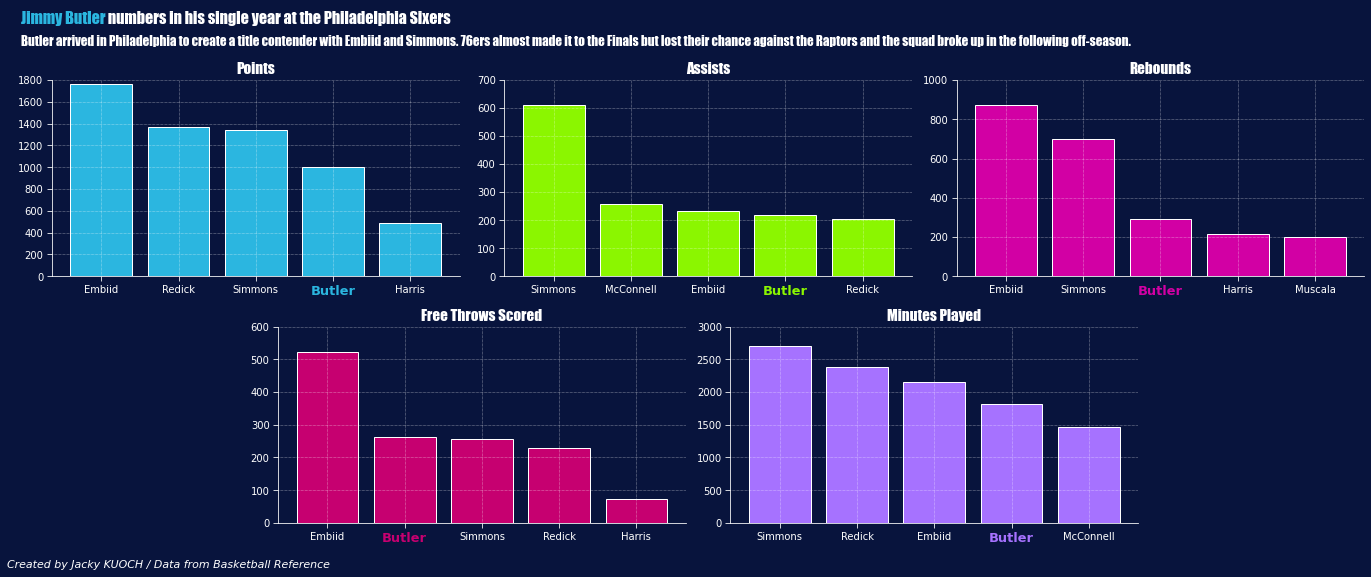

In [8]:
# Create subplots
fig,axs = plt.subplots(2,3,figsize = (19,7))
hfont = {'fontname':'Impact'}

#Position of the plots
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

#Add grid to the plots
ax1.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax2.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax3.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax4.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax5.grid(ls="dotted", lw="0.5", color="w", zorder=1)

#Change the background color
fig.set_facecolor("#08143D")
ax1.patch.set_facecolor("#08143D")
ax2.patch.set_facecolor("#08143D")
ax3.patch.set_facecolor("#08143D")
ax4.patch.set_facecolor("#08143D")
ax5.patch.set_facecolor("#08143D")

#Change the ticks color
ax1.tick_params(colors="w", length=5)
ax2.tick_params(colors="w", length=5)
ax3.tick_params(colors="w", length=5)
ax4.tick_params(colors="w", length=5)
ax5.tick_params(colors="w", length=5)

#Change the axes color
## First plot
ax1.spines['bottom'].set_color("w")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("w")

## Second plot
ax2.spines['bottom'].set_color("w")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("w")

## Third plot
ax3.spines['bottom'].set_color("w")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_color("w")

## Fourth plot
ax4.spines['bottom'].set_color("w")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_color("w")

## Fith plot
ax5.spines['bottom'].set_color("w")
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_color("w")

## Set ylimits
ax1.set_ylim(0,1800)
ax2.set_ylim(0,700)
ax3.set_ylim(0,1000)
ax4.set_ylim(0,600)
ax5.set_ylim(0,3000)

# Title and credits
fig_text(0.01,1.08, s="<Jimmy Butler> numbers in his single year at the Philadelphia Sixers\n", highlight_textprops=[{"color": '#2bb6e0'}], fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.01,1.01, "Butler arrived in Philadelphia to create a title contender with Embiid and Simmons. 76ers almost made it to the Finals but lost their chance against the Raptors and the squad broke up in the following off-season.", fontsize = 13, fontweight="light", color = "w", **hfont)
fig.text(0, -0.025, "Created by Jacky KUOCH / Data from Basketball Reference",fontstyle="italic",fontsize=11, color="w")

# Plot bar charts of stats
ax1.bar(points['Player'], points['PTS'], zorder=0, color="#2bb6e0",edgecolor = 'w')
ax2.bar(assists['Player'], assists['AST'], zorder=0, color="#8BF600",edgecolor = 'w')
ax3.bar(rebounds['Player'], rebounds['TRB'], zorder=0, color="#D200A4",edgecolor = 'w')
ax4.bar(freethrows['Player'], freethrows['FT'],zorder=0, color="#C60070",edgecolor = 'w')
ax5.bar(minutes['Player'], minutes['MP'],zorder=0, color="#A672FF",edgecolor = 'w')

# Axes Label
ax1.set_title("Points", color="w", fontsize=15 , **hfont)
ax2.set_title("Assists", color="w", fontsize=15 , **hfont)
ax3.set_title("Rebounds", color="w", fontsize=15 , **hfont)
ax4.set_title("Free Throws Scored", color="w", fontsize=15 , **hfont)
ax5.set_title("Minutes Played", color="w", fontsize=15 , **hfont)

#Highlight Jimmy's xticks for first plot
ax1.get_xticklabels()[3].set_color("#2bb6e0")
ax1.get_xticklabels()[3].set_fontsize(13)
ax1.get_xticklabels()[3].set_weight("heavy")

#Highlight Jimmy's xticks for second plot
ax2.get_xticklabels()[3].set_color("#8BF600")
ax2.get_xticklabels()[3].set_fontsize(13)
ax2.get_xticklabels()[3].set_weight("heavy")

#Highlight Jimmy's xticks for third plot
ax3.get_xticklabels()[2].set_color("#D200A4")
ax3.get_xticklabels()[2].set_fontsize(13)
ax3.get_xticklabels()[2].set_weight("heavy")

#Highlight Jimmy's xticks for fourth plot
ax4.get_xticklabels()[1].set_color("#C60070")
ax4.get_xticklabels()[1].set_fontsize(13)
ax4.get_xticklabels()[1].set_weight("heavy")

#Highlight Jimmy's xticks for fith plot
ax5.get_xticklabels()[3].set_color("#A672FF")
ax5.get_xticklabels()[3].set_fontsize(13)
ax5.get_xticklabels()[3].set_weight("heavy")


fig.tight_layout()